In [ ]:
import random
import math

def cost_function(puzzle):
    cost = 0
    for i in range(512):
        for j in range(512):
            if j + 1 != 512 and (j + 1) % 128 == 0:
                cost += abs(int(puzzle[(512*i) + j]) - int(puzzle[(512*i) + j + 1]))
            if i + 1 != 512 and (i + 1) % 128 == 0:
                cost += abs(int(puzzle[(512*i) + j]) - int(puzzle[(512*(i+1)) + j]))
    return cost

def swap_pieces(puzzle):
    # The puzzle is divided into 16 blocks of 128x128.
    # We need to swap two random blocks.
    # i and j are indices of the blocks to swap (0-15).
    i, j = random.sample(range(16), 2)

    # Calculate the row and column of the blocks.
    r1, c1 = divmod(i, 4)
    r2, c2 = divmod(j, 4)

    # Calculate the starting row and column index in the flattened puzzle array.
    rn1, cn1 = r1 * 128, c1 * 128
    rn2, cn2 = r2 * 128, c2 * 128

    # Extract the pieces to be swapped.
    piece1 = []
    for row in range(128):
        for col in range(128):
            piece1.append(puzzle[(512 * (rn1 + row)) + (cn1 + col)])

    piece2 = []
    for row in range(128):
        for col in range(128):
            piece2.append(puzzle[(512 * (rn2 + row)) + (cn2 + col)])

    # Swap the pieces in the puzzle array.
    for row in range(128):
        for col in range(128):
            puzzle[(512 * (rn1 + row)) + (cn1 + col)] = piece2[(row * 128) + col]
            puzzle[(512 * (rn2 + row)) + (cn2 + col)] = piece1[(row * 128) + col]

    return puzzle

def simulated_annealing(puzzle, T_initial, alpha, stopping_temp):
    minCost = 100000000
    minState = []
    c = 0
    T = T_initial
    current_state = puzzle
    current_cost = cost_function(current_state)

    while T > stopping_temp:
        c = c + 1
        new_state = swap_pieces(current_state.copy())
        new_cost = cost_function(new_state)

        if new_cost < current_cost:
            current_state = new_state
            current_cost = new_cost
            if(current_cost < minCost):
                minCost = current_cost
                minState = current_state.copy()
        else:
            if random.uniform(0, 1) < math.exp((current_cost - new_cost) / T):
                current_state = new_state
                current_cost = new_cost

        T *= alpha

    return minState, minCost

puzzle = []
with open('scrambled_lena.mat', 'r') as file:
    for _ in range(5):
        next(file)

    for line in file:
        puzzle.append(line.strip()) # Add strip here as well for consistency

ans = []
minCost = 100000000 # Initialize with a large value
for i in range(5):
    T_initial = 1000
    alpha = 0.99
    stopping_temp = 0.1
    # Create a fresh copy of the original puzzle for each annealing run
    current_puzzle = []
    with open('scrambled_lena.mat', 'r') as file:
        for _ in range(5):
            next(file)
        for line in file:
            current_puzzle.append(line.strip())

    solved_puzzle, cost = simulated_annealing(current_puzzle, T_initial, alpha, stopping_temp)

    if(cost < minCost):
        minCost = cost
        ans = solved_puzzle.copy()
    print(f"Run {i+1}: Cost = {cost}")

with open('answer.mat', 'w') as file:
    for item in ans:
        file.write(f"{item}\n") # Add newline for proper formatting

Run 1: Cost = 44437
Run 2: Cost = 20852
Run 3: Cost = 83636
Run 4: Cost = 78021
Run 5: Cost = 83136


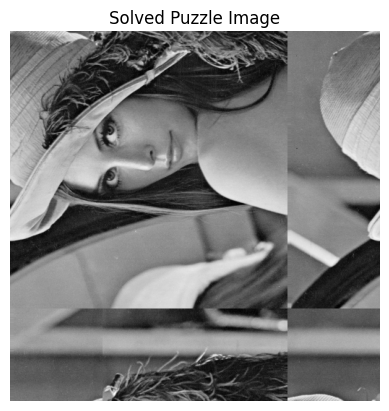

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Load the data from the answer.mat file
image_data = []
with open('answer.mat', 'r') as file:
    for line in file:
        line = line.strip() # Remove leading/trailing whitespace
        if line:  # Check if the line is not empty
            image_data.append(int(line))

# Convert the list to a numpy array and reshape it to 512x512
image_array = np.array(image_data).reshape((512, 512))

# Display the image
plt.imshow(image_array, cmap='gray') # Assuming it's a grayscale image
plt.title('Solved Puzzle Image')
plt.axis('off') # Hide axes
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')